In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.354963,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.131853,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.447884,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,94.968758,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15,90.873482,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16,90.534698,90.860001,91.750000,90.010002,91.199997,48485500


In [7]:
ma_100_days = data.Close.rolling(100).mean()

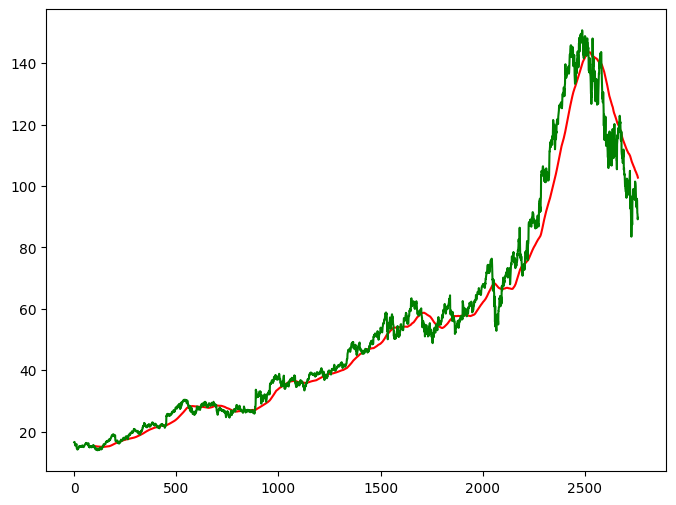

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

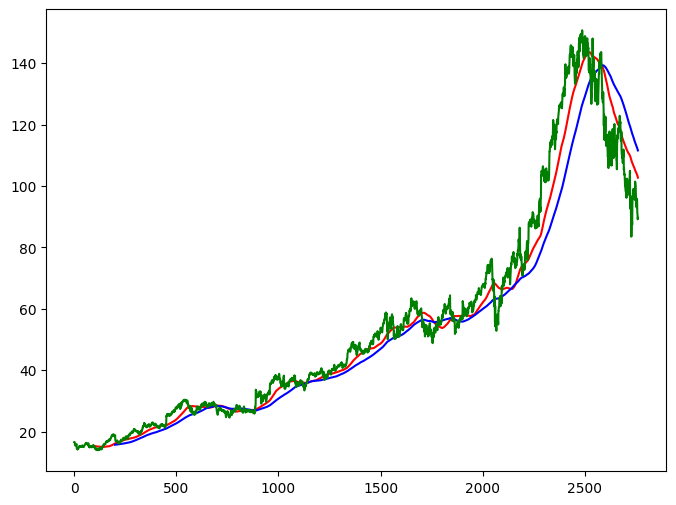

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2208

In [14]:
data_test.shape[0]

553

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [18]:
x, y = np.array(x), np.array(y)

In [19]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense

In [20]:


model = Sequential()
# Define the input explicitly using the Input layer
model.add(Input(shape=(x.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 282ms/step - loss: 0.0779
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 0.0074
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - loss: 0.0082
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 292ms/step - loss: 0.0058
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 274ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 275ms/step - loss: 0.0054
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 271ms/step - loss: 0.0059
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 280ms/step - loss: 0.0048
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0038
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - loss: 0.0035
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - loss: 0.0041
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 18s 278ms/step - loss: 0.0034
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 19s 284ms/step - loss: 0.0033
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - loss: 0.0032
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
pas_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale  =  scaler.fit_transform(data_test)

In [27]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step


In [29]:
scale =1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

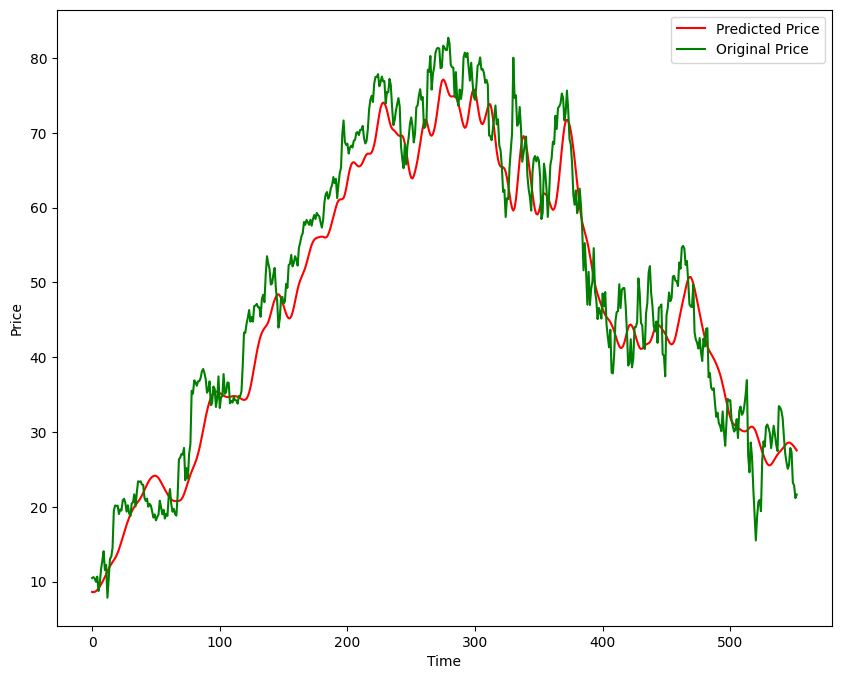

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')